# Hometask 5 #

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Задача 1

Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.


In [2]:
import time

weights = [0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2]


weights_normed = weights / np.sum(weights)
weights_bounded = np.cumsum(weights_normed)
weights_bounded

start_time = time.time()
weights_rand = np.array([np.random.rand() for i in range(1000)])
for i in range(10):
    weights_rand[weights_rand < weights_bounded[i]] = i + 1
weights_rand = weights_rand - 1
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0019567012786865234 seconds ---


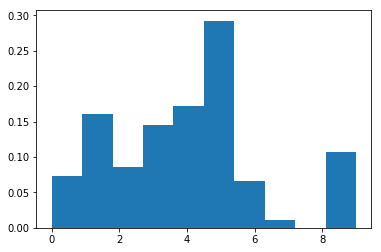

In [3]:
plt.hist(weights_rand, density = True)
plt.show()

In [4]:
weights = [0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2]

weights_sort = np.sort(weights)
weights_sort_normed = weights_sort / np.sum(weights)

weights_sort_bounded = np.cumsum(weights_sort_normed)
weights_sort_bounded

start_time = time.time()
weights_sort_rand = np.array([np.random.rand() for i in range(1000)])
for i in range(10):
    weights_sort_rand[weights_sort_rand < weights_sort_bounded[i]] = np.argsort(weights)[i] + 1
weights_sort_rand = weights_sort_rand - 1
print("--- %s seconds ---" % (time.time() - start_time))


--- 0.0011138916015625 seconds ---


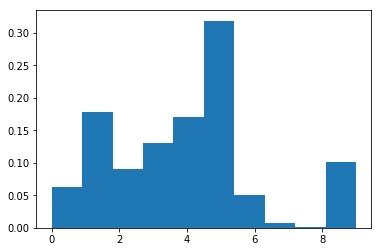

In [5]:
plt.hist(weights_sort_rand, density = True)
plt.show()

### Задача 2

Смоделируйте выборку размера 1000 из распределения  Exp(λ) . Постройте выборочную гистограмму и точный график плотности распределения.


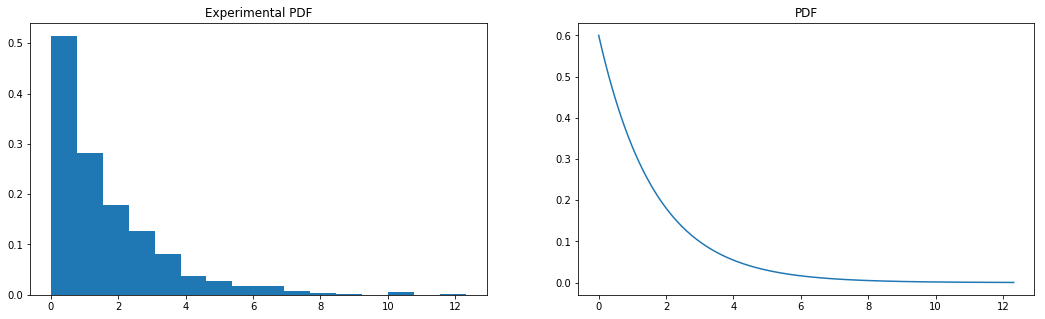

In [6]:
random = np.array([np.random.rand() for i in range(1000)])
#for probability Exp(a) pdf = a * exp(-ax), x > 0, a > 0
# CDF = 1 - exp(-ax), x > 0

a = 0.6 #can be changed

exp_rand = - np.log(1 - random) / a

fig, ax = plt.subplots(1, 2, figsize = (18, 5))

X = np.linspace(0, np.max(exp_rand), 256)
ax[0].hist(exp_rand, density = True, bins = 16)
ax[0].set_title('Experimental PDF')
ax[1].plot(X, a * np.exp(-a * X))
ax[1].set_title('PDF')
plt.show()

### Задача 3
Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

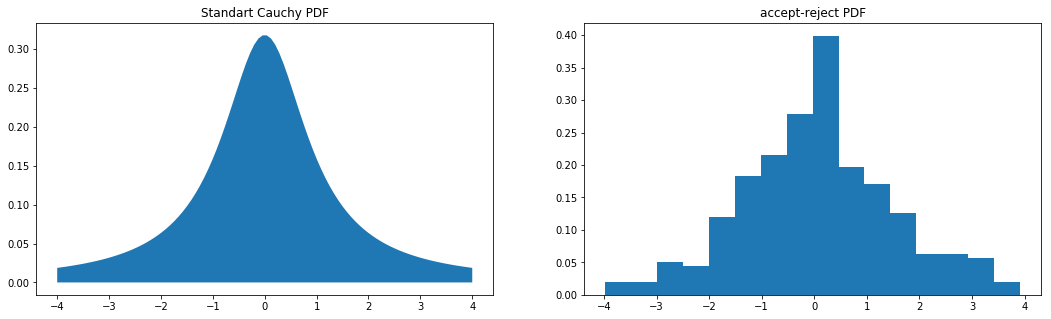

In [7]:
from scipy import stats
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)

random = np.array(np.random.uniform(-4, 4, 1000))
#Standart Cauchy pdf = ((x^2 + 1) * Pi) ^ (-1)
check_rand = np.array([np.random.rand() for i in range(1000)]) / 3 # because max in cauchy is 1 / Pi 
cauchy_rand = random[(lambda x: 1 / ((x ** 2 + 1) * np.pi)) (random) >= check_rand]


fig, ax = plt.subplots(1, 2, figsize = (18, 5))
ax[0].fill_between(x, 0, dist.pdf(x))
ax[0].set_title('Standart Cauchy PDF')
ax[1].hist(cauchy_rand, density = True, bins = 16)
ax[1].set_title('accept-reject PDF')
plt.show()

### Задача 4
Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора. 

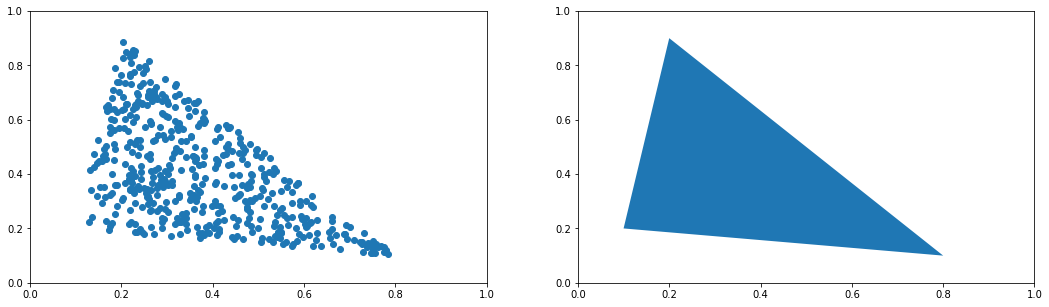

In [8]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
#plt.gca().add_collection(PatchCollection([polygon]))
#plt.show()

rand_square = np.random.rand(500, 2)

rand_triangle = rand_square[- 2 * rand_square[:, 0] + 2 > rand_square[:, 1]]
tmp_triangle = rand_square[- 2 * rand_square[:, 0] + 2 <= rand_square[:, 1]]
tmp_triangle[:, 0] = 0.5 - (tmp_triangle[:, 0] - 0.5)
tmp_triangle[:, 1] = 1 - (tmp_triangle[:, 1] - 1)
rand_triangle = np.vstack((rand_triangle, tmp_triangle))

# [1, 2], [2, 9], [8, 1] -- borders
# [0, 0], [0, 2], [1, 0]
tmp_triangle = np.array(rand_triangle)
rand_triangle[:, 0] = 7 * tmp_triangle[:, 0] + 0.5 * tmp_triangle[:, 1] + 1
rand_triangle[:, 1] = -1 * tmp_triangle[:, 0] + 3.5 * tmp_triangle[:, 1] + 2
rand_triangle = rand_triangle * 0.1

fig, ax = plt.subplots(1, 2, figsize = (18, 5))
ax[0].scatter(rand_triangle[:, 0], rand_triangle[:, 1])
ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, 1)
ax[1] = plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

### Задача 5
Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

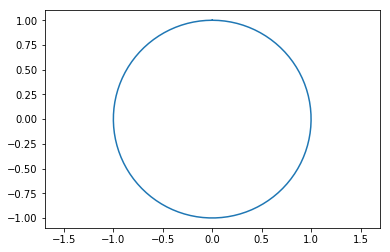

In [9]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
#plt.plot((np.sin(t) + 1) / 2, (np.cos(t) + 1) / 2)
plt.axis('equal')
plt.show()

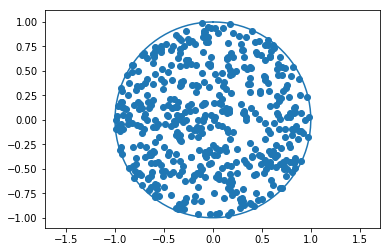

In [10]:
rand_square = np.random.rand(500, 2)

rand_square[:, 1] = rand_square[:, 1] * 2 * np.pi

rand_circle = np.array(rand_square)
rand_circle[:, 0] = np.sqrt(rand_square[:, 0]) * np.cos(rand_square[:, 1])
rand_circle[:, 1] = np.sqrt(rand_square[:, 0]) * np.sin(rand_square[:, 1])

t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t)) #circle
plt.scatter(rand_circle[:, 0], rand_circle[:, 1])
plt.axis('equal')
plt.show()

### Задача 6
Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

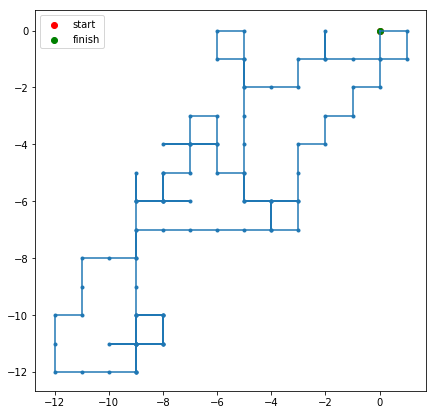

In [11]:
def dist(value):
    return np.abs(value[0]) + np.abs(value[1])

def dist_x(value):
    return np.abs(value[0])

def dist_y(value):
    return np.abs(value[1])

random_walk = np.array([[0, 0]])
n = 100
for i in range(1, n):
    tmp = np.random.rand()
    if (dist(random_walk[i - 1]) < n - i - 1):
        movement = ([-1, 0] if tmp < 0.25 else [1, 0] if tmp < 0.5 else [0, -1] if tmp < 0.75 else [0, 1])
    elif (dist_x(random_walk[i - 1]) > 0 and dist_y(random_walk[i - 1]) > 0):
        movement = ([-np.sign(random_walk[i - 1][0]), 0] if tmp < 0.5 else [0, -np.sign(random_walk[i - 1][1])])
    elif (dist_x(random_walk[i - 1]) > 0 and dist_y(random_walk[i - 1]) == 0):
        movement = [-np.sign(random_walk[i - 1][0]), 0]
    else:
        movement = [0, -np.sign(random_walk[i - 1][1])]
    value = random_walk[i - 1] + movement
    random_walk = np.vstack((random_walk, value))

plt.figure(figsize=(7, 7))
plt.plot(random_walk[:, 0], random_walk[:, 1])
plt.scatter(random_walk[:, 0], random_walk[:, 1], marker = '.')
plt.scatter(0, 0, c = 'r', marker = 'o', label = 'start')
plt.scatter(random_walk[-1, 0], random_walk[-1, 1], c = 'g', marker = 'o', label = 'finish')
plt.legend()
plt.show()

### Задача 7

Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций ```np.sin``` и ```np.cos```. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

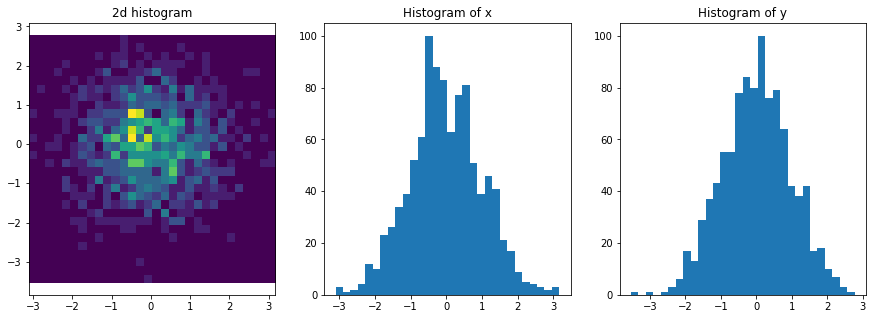

In [12]:
#Given method
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

Transformed method


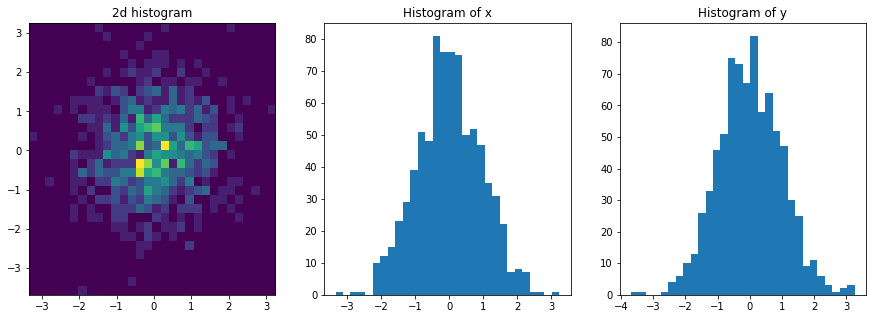


Transform to another distribution


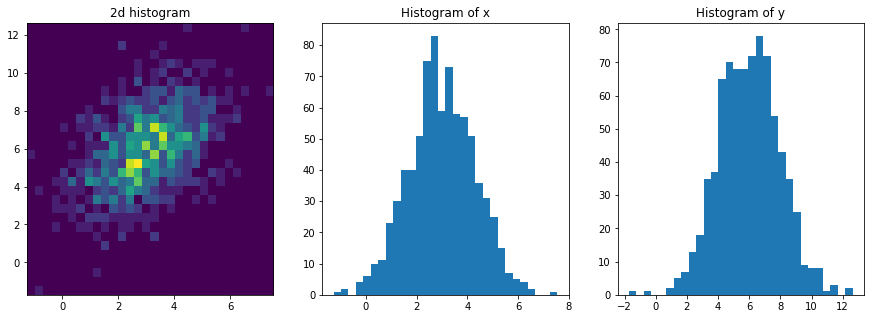

In [13]:
#Transformed method
n = 1000
u1, u2 = np.random.rand(2, n) * 2 - 1 # uniform [-1, 1]
s = u1 ** 2 + u2 ** 2
tmp = s[s > 0][s <= 1]
u1 = u1[s > 0][s <= 1]
u2 = u2[s > 0][s <= 1]
r = np.sqrt(-2 * np.log(tmp) / tmp)
x = u1 * r
y = u2 * r

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
#ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
print("Transformed method")
plt.show()

# N_   = ( (3) , (2, 1) )
#   2    ( (6)   (1, 4) )
# z = m + sigma * (x, y)
m = np.array([3, 6])
sigma = np.array([[2, 1],
                  [1, 4]])
# here covariation matrix is (2, 1) ^2 = (5, 6 ) 
#                            (1, 4)      (6, 17)
#
#x1 = m[0] + sigma[0, 0] * x + sigma[0, 1] * y
#y1 = m[1] + sigma[1, 0] * x + sigma[1, 1] * y

# find sqrt(sigma)
delta = 5 # det(sigma)
tr = 6    # tr(sigma)
s = np.sqrt(delta)
t = np.sqrt(tr + 2 * s)
sigma_root = (sigma + s * np.diag([1, 1])) / t
x2 = m[0] + sigma_root[0, 0] * x + sigma_root[0, 1] * y
y2 = m[1] + sigma_root[1, 0] * x + sigma_root[1, 1] * y

# here covariation matrix is (2, 1)  
#                            (1, 4)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x2, y2, bins=30)
ax[1].hist(x2, bins=30)
ax[2].hist(y2, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
print("\nTransform to another distribution")
plt.show()

### Задача 8
Перейдите от вектора из независимых стандартных нормальных величин к гауссовскому вектору с нулевым средним и заданной ниже ковариационно матрицей. Обоснуйте теоретически и численно, что полученный вектор обладает требуемой ковариационной матрицей.

In [14]:
B = np.array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
              [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
              [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
              [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
              [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
              [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
              [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
              [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
              [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])

Изучив матрицу ковариации приходим к выводу, что вектор состоит из 4 независимых между собой компонент:

1) x_1, x_5, x_9;

2) x_2, x_4;

3) x_3, x_7;

4) x_6, x_8;

При этом случайные величины внутри компонет попарно коррелируют. Поэтому исходну задачу можно разложить на 4 меньшей размерности: составиить один 3-мерный и три 2-мернных гауссовских вектора (при этом 2-мерные случаи одинаковы)

In [15]:
A_1 = np.array(B[[0, 4, 8]][:, [0, 4, 8]])
A_2 = np.array(B[[1, 3]][:, [1, 3]])
A_3 = np.array(B[[2, 6]][:, [2, 6]])
A_4 = np.array(B[[5, 7]][:, [5, 7]])
print(A_1, '\n\n', A_2, '\n\n', A_3, '\n\n', A_4)

[[ 2. -1. -1.]
 [-1.  2. -1.]
 [-1. -1.  2.]] 

 [[ 4. -1.]
 [-1.  4.]] 

 [[ 4. -1.]
 [-1.  4.]] 

 [[ 4. -1.]
 [-1.  4.]]


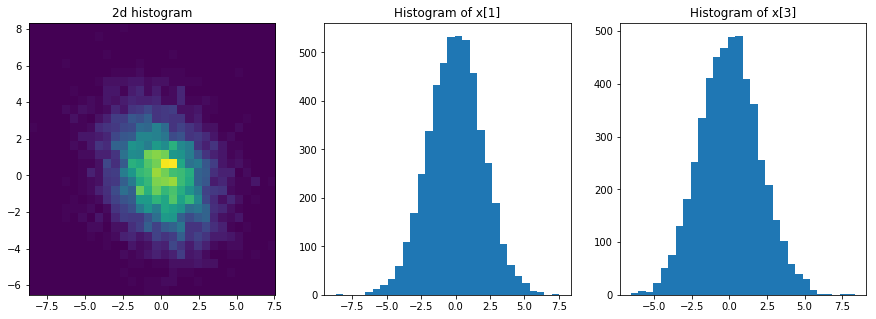

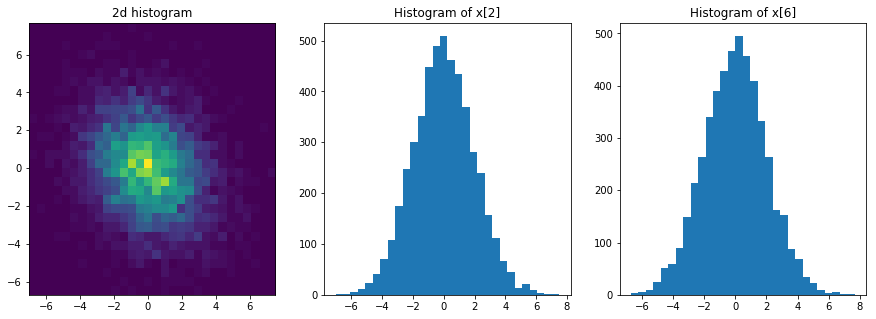

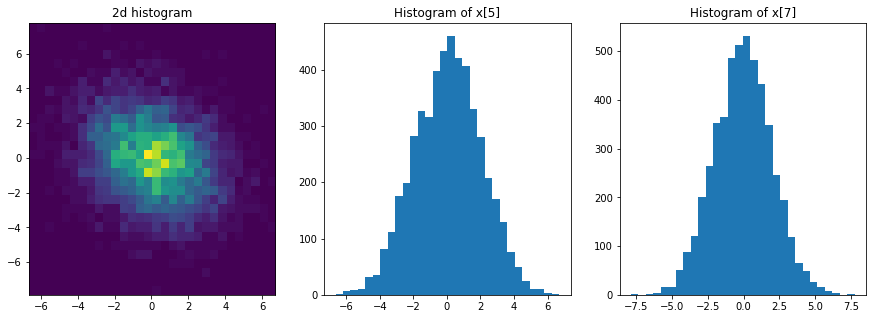

In [16]:
n = 5000
u = np.random.standard_normal([9, n])
x = np.array(u)

# finding 2-demensional vector like it was done above
delta = 15 # det(A_2) = det(A_3) = det(A_4)
tr = 8    # tr(A_2) = tr(A_3) = tr(A_4)
s = np.sqrt(delta)
t = np.sqrt(tr + 2 * s)
sigma_root = (A_2 + s * np.diag([1, 1])) / t
x[[1, 2, 5]] = sigma_root[0, 0] * u[[1, 2, 5]] + sigma_root[0, 1] * u[[3, 6, 7]]
x[[3, 6, 7]] = sigma_root[1, 0] * u[[1, 2, 5]] + sigma_root[1, 1] * u[[3, 6, 7]]

#
#x[0], x[4], x[8] = ???
# it is needed to find matrix square root of matrix 3x3 
#

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x[1], x[3], bins=30)
ax[1].hist(x[1], bins=30)
ax[2].hist(x[3], bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x[1]")
ax[2].set_title("Histogram of x[3]")
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x[2], x[6], bins=30)
ax[1].hist(x[2], bins=30)
ax[2].hist(x[6], bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x[2]")
ax[2].set_title("Histogram of x[6]")
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x[5], x[7], bins=30)
ax[1].hist(x[5], bins=30)
ax[2].hist(x[7], bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x[5]")
ax[2].set_title("Histogram of x[7]")
plt.show()

### Задача 9
С помощью метода Монте-Карло (бросанием случайной точки в квадрат) оцените число  π . Теоретически обоснуйте необходимое число бросаний, чтобы оценить число  π  с точностью 3 знака после запятой и достоверностью 99%. С помощью метода Монте-Карло оцените, сколько на практике требуется бросаний, чтобы достичь с требуемой достоверностью нужной точности.

Для вычисления π будем искать площадь четверти единичного круга. Её площадь равна π/4. Возьмём на координатной плоскости (x, y) четверть круга единичного радиуса, заключённую в единичный квадрат. Разбросаем равномерно по квадрату n точек.  Вероятность попасть в четверть круга равна доли площади четверти круга в площади квадрата, то есть π/4.

In [17]:
#n = 50000000 # 5 * 10^8 
n = 10000000 # 10^8

rand_square = np.array([np.random.rand(2) for i in range(n)])

in_circle = rand_square[rand_square[:, 0] ** 2 + rand_square[:, 1] ** 2 <= 1]

pi = 4 * len(in_circle) / len(rand_square)
pi, 355 / 113, np.pi

(3.1417616, 3.1415929203539825, 3.141592653589793)

### Задача 10

Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов. 

In [18]:
#split the set in n parts and give each element number of subset in which it lies
def split(A):
    n = np.random.randint(1, len(A[:]))
    check_set = np.arange(n)
    choice_set = np.arange(n)
    split_A = np.zeros(len(A[:]))
    for i in range(len(A[:])):
        if (len(check_set[check_set != 0]) < len(A[:]) - i):
            num = choice_set[np.random.randint(0, n)]
            #print(num)
            split_A[i] = num
            check_set[num] = 0
        elif (len(check_set[check_set != 0]) > 0):
            num = choice_set[check_set != 0][np.random.randint(0, len(check_set[check_set != 0]))]
            split_A[i] = num
            check_set[num] = 0
        else:
            break
        
    return split_A

n = 100
A = np.array([np.random.rand(2) for i in range(n)])
#Average number of subsets 
np.mean(np.array([len(np.unique(split(A))) + 1 for i in range(n)]))

49.05

### Бонус

Случайные числа генерируются методом LCG по формуле next = (a * current + c) % m. Константы a, m, c и начальная инициализация неизвестны. Ниже приведена смоделированная последовательность длины 100, каким будет 101 число?

[91143957525, 72152561493, 16488575863, 78723844732,
39650992134, 49490708734, 95637955772, 91242543078,
68627322005, 60631370900, 69953849019, 131494761995,
62673807843, 59716054233, 69127367898, 39233755450,
125455457666, 109600488012, 7431205397, 4385706296,
75926220981, 97163031028, 72677334199, 36641911059,
14174545774, 47464857381, 101634801557, 17933990204,
98386511935, 74167797746, 82661475281, 99115221055,
133097039008, 5924378212, 124040343623, 134483600734,
31637525959, 134108093465, 98885399365, 113503340702,
127568717809, 22819095499, 89973086127, 52412306129,
68193868122, 105643387627, 131953791389, 83254262499,
71639839245, 104792498353, 111111451072, 77913256122,
87408310351, 48640876886, 117077153907, 5205956967,
27714472246, 34875750439, 100215038203, 82904267139,
64766351391, 116874708395, 24475216421, 40683855730,
45722868978, 98815406129, 91404099330, 97127512068,
23034155668, 96554614560, 83024886757, 62594243893,
23255895237, 109335666325, 84674225740, 13641808209,
21844939347, 30860664525, 78581286049, 13878598309,
51215938257, 120374029609, 10889332075, 15566462607,
29746343618, 55356465751, 51550673843, 113416258594,
1171023799, 136712225207, 59794904654, 34872918073,
98081973844, 75720369863, 80372265821, 91862303826,
113335018225, 75687253385, 11012189811, 84538732806]

In [19]:
data_set_clear = [91143957525, 72152561493, 16488575863, 78723844732, 39650992134, 49490708734, 95637955772,    
                  91242543078, 68627322005, 60631370900, 69953849019, 131494761995, 62673807843, 59716054233, 
                  69127367898, 39233755450, 125455457666, 109600488012, 7431205397, 4385706296, 75926220981, 
                  97163031028, 72677334199, 36641911059, 14174545774, 47464857381, 101634801557, 17933990204, 
                  98386511935, 74167797746, 82661475281, 99115221055, 133097039008, 5924378212, 124040343623, 
                  134483600734, 31637525959, 134108093465, 98885399365, 113503340702, 127568717809, 22819095499, 
                  89973086127, 52412306129, 68193868122, 105643387627, 131953791389, 83254262499, 71639839245, 
                  104792498353, 111111451072, 77913256122, 87408310351, 48640876886, 117077153907, 5205956967, 
                  27714472246, 34875750439, 100215038203, 82904267139, 64766351391, 116874708395, 24475216421, 
                  40683855730, 45722868978, 98815406129, 91404099330, 97127512068, 23034155668, 96554614560, 
                  83024886757, 62594243893, 23255895237, 109335666325, 84674225740, 13641808209, 21844939347, 
                  30860664525, 78581286049, 13878598309, 51215938257, 120374029609, 10889332075, 15566462607, 
                  29746343618, 55356465751, 51550673843, 113416258594, 1171023799, 136712225207, 59794904654, 
                  34872918073, 98081973844, 75720369863, 80372265821, 91862303826, 113335018225, 75687253385, 
                  11012189811, 84538732806]  

In [20]:
len(data_set_clear)

100

In [21]:
data_set_diff_clear = []
for i in range(len(data_set_clear) - 1):
    data_set_diff_clear.append(data_set_clear[1:][i] - data_set_clear[:-1][i])

tmp_set = []
for i in range(len(data_set_diff_clear) - 2):
    tmp_set.append(data_set_diff_clear[2:][i] * data_set_diff_clear[:-2][i] - data_set_diff_clear[1:-1][i] ** 2)

module = np.gcd.reduce(tmp_set)
module

137438953447

In [22]:
def gcd(a, b):
    while a > 0 and b > 0:
        if a >= b:
            a = a % b
        else:
            b = b % a
    return max(a, b)


def extended_gcd(a, b):
    p = 1
    q = 0
    r = 0
    s = 1

    while a != 0 and b != 0:
        if a >= b:
            a = a - b
            p = p - r
            q = q - s
        else:
            b = b - a
            r = r - p
            s = s - q
    if a != 0:
        x = p
        y = q
    else:
        x = r
        y = s
    return x, y


def diophantine(a, b, c):
    (u, v) = extended_gcd(a, b)
    x = u * (c // gcd(a, b))
    y = v * (c // gcd(a, b))
    return x, y

In [23]:
a = diophantine(data_set_diff_clear[2], module, data_set_diff_clear[3])[0] % module
c = (data_set_clear[1] - a * data_set_clear[0]) % module
a, c

(31450092817, 123457)

In [24]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current

# setting the seed
rng.current = data_set_clear[0]

check_set = [rng(m = module, a = a, c = c) for i in range(101)]
ans = check_set[-1]
check_set[:5], data_set_clear[1:6], check_set[-1]

([72152561493, 16488575863, 78723844732, 39650992134, 49490708734],
 [72152561493, 16488575863, 78723844732, 39650992134, 49490708734],
 114736844727)

In [25]:
print("Answer is ", ans)

Answer is  114736844727
